**Problem Statement**

---
The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

1.  Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
2.   Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?
4.Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?


Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
NY_df=pd.read_csv('/content/drive/My Drive/311_Service_Requests_from_2010_to_Present_min.csv')

In [ ]:
NY_df.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
NY_df.drop('Unnamed: 0',axis=1,inplace=True)
NY_df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [ ]:
NY_df.rename(columns = {'Unique Key':'unique_key','Created Date':'created_date','Closed Date':'closed_date','Complaint Type':'complaint_type','Location Type':'location_type','Incident Zip':'incident_zip',
                        'Incident Address':'incident_address','Street Name':'street_name','Address Type':'address_type','City':'city','Status':'status','Resolution Description':'resolution_description',
                         'Borough':'borough','Latitude':'latitude','Longitude':'longitude'},inplace = True)

In [ ]:
NY_df.head()

,unique_key,created_date,closed_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough,latitude,longitude
0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


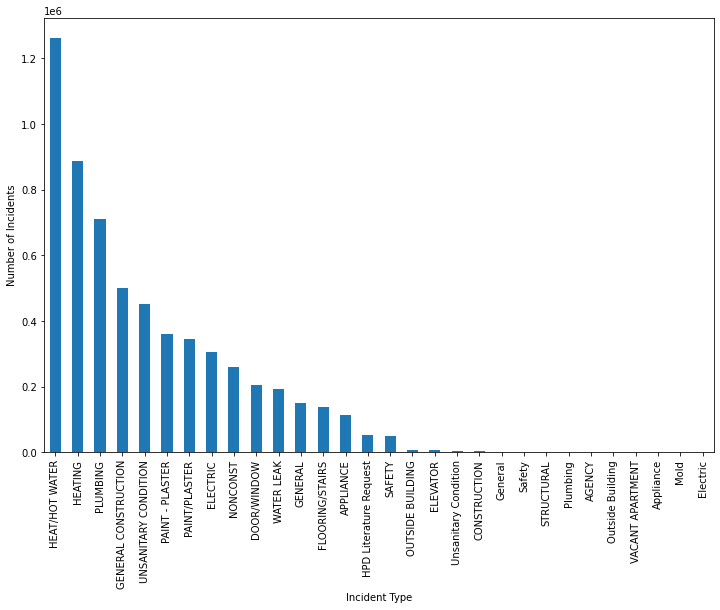

In [ ]:
NY_complaints=NY_df['complaint_type'].value_counts()
plt.figure(figsize=(12,8))
plt.ylabel('Number of Incidents')
plt.xlabel('Incident Type')
NY_complaints.plot(kind='bar')

Now we get that the Department of Housing Preservation and Development of New York City should focus on **HEAT/HOT WATER** complaint first.

In [ ]:
df=NY_df.dropna()
df.shape

(5807301, 15)

In [ ]:
df=df[df['complaint_type']=='HEAT/HOT WATER']
df.shape

(1249818, 15)

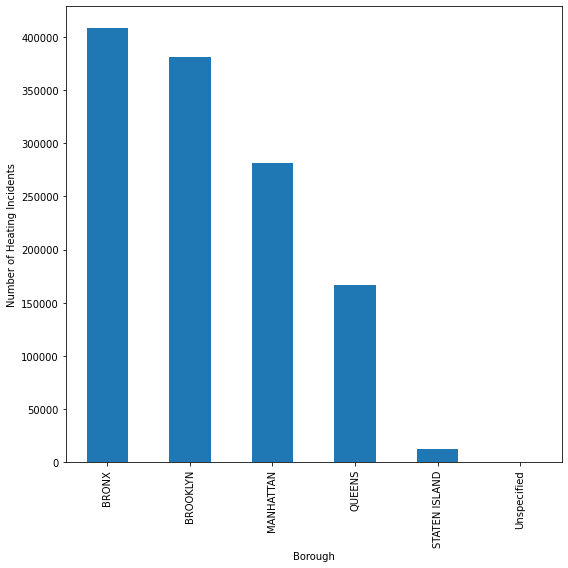

In [ ]:
plt.figure(figsize=(8,8))
df['borough'].value_counts().plot(kind='bar')
plt.ylabel('Number of Heating Incidents')
plt.xlabel('Borough')
plt.tight_layout()

In [ ]:
import folium
from folium import plugins

nyc = [40.7128,-74.0060]
nyc_map = world_map = folium.Map(location=nyc, zoom_start=10) 

complaints = plugins.MarkerCluster().add_to(nyc_map)

for lat, lng, label, in zip(df['latitude'].head(3000),df['longitude'].head(3000),df['incident_zip'].astype(int).astype(str).head(3000)):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(complaints)

In [ ]:
nyc_map

From Above We are sure of that **Bronx** and **Brooklyn** are the most affected areas by **Heat/Hot Water** complaint. 




In [ ]:
df_bronx=pd.read_csv('/content/drive/My Drive/BX_18v1.csv')
df_brok=pd.read_csv('/content/drive/My Drive/BX_18v1.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_brok.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,...,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,Z9,NaN,0,NaN,122 BRUCKNER PARTNERS,15000,0,0,0,0,0,0,...,0,75.00,200.0,0.0,0.0,NaN,0.0,N,3.0,0.0,130500,161100,0,0,0,0,0,NaN,NaN,0.00,6.02,5.0,6.5,2,2022600001,0,19,1005957.0,232162.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,G5,7.0,0,NaN,24 INDIAN HEAD HOLDIN,13770,752,752,0,272,0,0,...,1,137.58,100.0,16.0,16.0,NaN,0.0,N,5.0,0.0,117000,326700,0,0,1931,1994,0,NaN,NaN,0.05,6.02,5.0,6.5,2,2022600004,0,19,1006076.0,232156.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,F5,6.0,0,P,ANJOST CORP,35000,39375,39375,0,0,0,0,...,1,175.00,200.0,175.0,200.0,NaN,0.0,N,4.0,0.0,153000,879300,0,0,1931,0,0,NaN,NaN,1.13,6.02,5.0,6.5,2,2022600010,0,19,1006187.0,232036.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C1,2.0,0,NaN,144 BRUCKNER LLC,2500,12500,0,12500,0,0,0,...,15,25.00,100.0,25.0,85.0,NaN,0.0,N,5.0,0.0,51300,332550,0,0,1931,2001,0,NaN,NaN,5.00,6.02,5.0,6.5,2,2022600017,0,19,1006299.0,232033.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,148 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C7,2.0,0,P,148 BRUCKNER LLC,1875,8595,1719,6876,0,1719,0,...,10,25.00,75.0,25.0,70.0,NaN,0.0,N,3.0,2.0,17490,125304,0,52349,1920,2009,0,NaN,NaN,4.58,6.02,5.0,6.5,2,2022600018,0,19,1006363.0,232040.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [ ]:
df_brok.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

In [ ]:
df_bronx=df_bronx[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 
                     'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 
                     'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord','XCoord']]
df_brok=df_brok[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 
                     'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 
                     'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord','XCoord']]

In [ ]:
df_brok.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [ ]:
NY_bronx=df.copy()
NY_bronx=NY_bronx[NY_bronx['borough']=='BRONX']
NY_bronx.head()

,unique_key,created_date,closed_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough,latitude,longitude
33,45530303,02/02/2020 08:24:04 AM,02/02/2020 06:53:37 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.854439,-73.898423
85,45529809,02/02/2020 12:09:59 PM,02/02/2020 06:53:37 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.854439,-73.898423
168,45531280,02/02/2020 04:55:26 PM,02/02/2020 06:53:37 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.854439,-73.898423
238,45528866,02/02/2020 11:41:31 AM,02/02/2020 06:53:37 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.854439,-73.898423
244,45527551,02/02/2020 02:22:41 PM,02/02/2020 06:53:37 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.854439,-73.898423


In [ ]:
NY_brok=df.copy()
NY_brok=NY_brok[NY_brok['borough']=='BROOKLYN']
NY_brok.head()

,unique_key,created_date,closed_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough,latitude,longitude
82,45527549,02/02/2020 07:49:04 AM,02/02/2020 06:06:59 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11203.0,676 MIDWOOD STREET,MIDWOOD STREET,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN,40.660864,-73.938398
179,45528906,02/02/2020 04:12:50 PM,02/02/2020 06:07:00 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11210.0,837 EAST 22 STREET,EAST 22 STREET,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN,40.632189,-73.955603
203,45528365,02/02/2020 12:20:54 PM,02/02/2020 06:06:59 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11203.0,676 MIDWOOD STREET,MIDWOOD STREET,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN,40.660864,-73.938398
314,45527983,02/02/2020 03:35:01 PM,02/02/2020 05:27:33 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11223.0,128 LAKE STREET,LAKE STREET,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN,40.600898,-73.973532
361,45530322,02/02/2020 04:43:52 PM,02/02/2020 06:07:00 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11213.0,427 HERKIMER STREET,HERKIMER STREET,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN,40.679090,-73.939395


In [ ]:
def address_finder(address,incident_addresses):
    if (address in incident_addresses):
        return 1
    else:
        return 0

In [ ]:
incident_addresses = NY_bronx['incident_address'].unique()
df_bronx['complaint'] = df_bronx.apply(lambda x: address_finder(x['Address'],incident_addresses),axis=1)

In [ ]:
incident_addresses = NY_brok['incident_address'].unique()
df_brok['complaint'] = df_brok.apply(lambda x: address_finder(x['Address'],incident_addresses),axis=1)

In [ ]:
df_brok.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,complaint
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,0


In [ ]:
def corr_finder(df):
    corr = df.select_dtypes(include="number").corr()
    plt.figure(figsize=(8,8));
    corr["complaint"].sort_values(ascending=True)[:-1].plot(kind="barh")
    plt.title("Correlation of numerical feature to Complaint at Address")
    plt.xlabel("Correlation to Complaint")
    plt.tight_layout()
    plt.show()

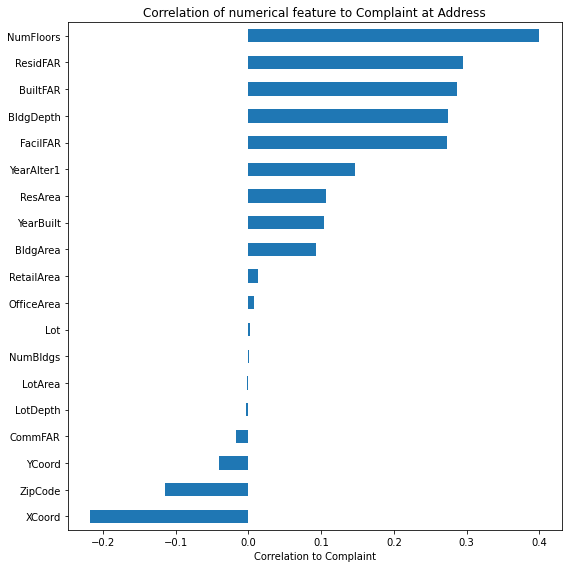

In [ ]:
corr_finder(df_bronx)


From above data we can see that for **Bronx** the features that are correlated with complaint **Heat/Hot water** are 'BldgArea', 'BldgDepth', 'BuiltFAR','FacilFAR', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1'. 

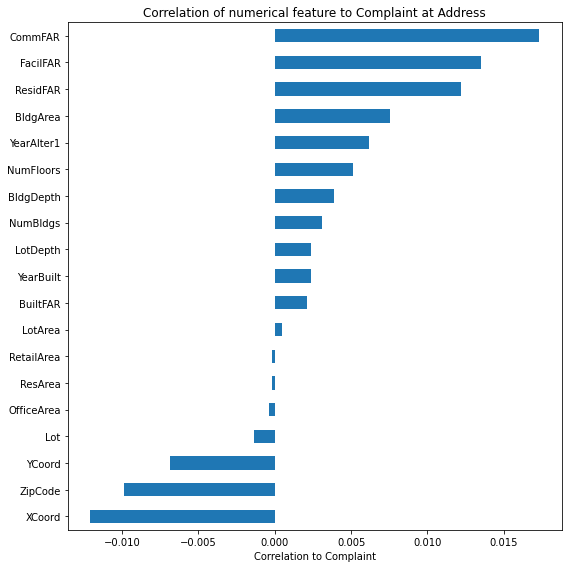

In [ ]:
corr_finder(df_brok)

From above data we can see that for **Brooklyn** the features that are correlated with complaint **Heat/Hot water** are 'BldgArea', 'BldgDepth', 'BuiltFAR','FacilFAR', 'CommFAR','NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1'. 

In [ ]:
x = df_bronx[['NumFloors','ResidFAR','BuiltFAR','BldgDepth','FacilFAR']].values #taking the most correlated factors
y = df_bronx[["complaint"]].values

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
complaintTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
complaintTree.fit(train_X,train_Y)
predicted_Y = complaintTree.predict(test_X)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(test_Y, predicted_Y)

0.8879305547827054

In [ ]:
predictY = complaintTree.predict([["5.0","7","5.5","75",'7']])
predictY[0]

1

In [ ]:
x_brok = df_brok[['CommFAR','FacilFAR','ResidFAR','BldgArea','NumFloors']].values #taking the most correlated factors
y_brok = df_brok[["complaint"]].values

In [ ]:
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
complaintTree1= DecisionTreeClassifier(criterion="entropy", max_depth = 10)
complaintTree1.fit(train_X1,train_Y1)
predicted_Y1 = complaintTree1.predict(test_X1)

In [ ]:
metrics.accuracy_score(test_Y1, predicted_Y1)

0.8880974904012019

In [ ]:
predictY1 = complaintTree1.predict([["5","6.5","6.5","40000",'2']])
predictY1[0]

0

We can see that **complaintTree** and **complaintTree1** are the two model for Bronx and Brooklyn to predict for the future complaints for the certain features of the Houses. Bonx complaintTree and Brooklyn complaintTree1 has quite similar accuracy score which is almost 89%. So i think the models are quite well for future predictions like whether there will be any **Heat/Hot Water** indident or not. 